## Outlier - removal - using - ZScore

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv("E:/Python and ML/Dataset/placement.csv")

In [11]:
df.shape

(1000, 3)

In [21]:
df.sample(5)

,cgpa,placement_exam_marks,placed
4,7.23,17.0,0
255,7.76,10.0,0
730,6.14,90.0,1
56,6.93,15.0,1
736,6.86,24.0,1


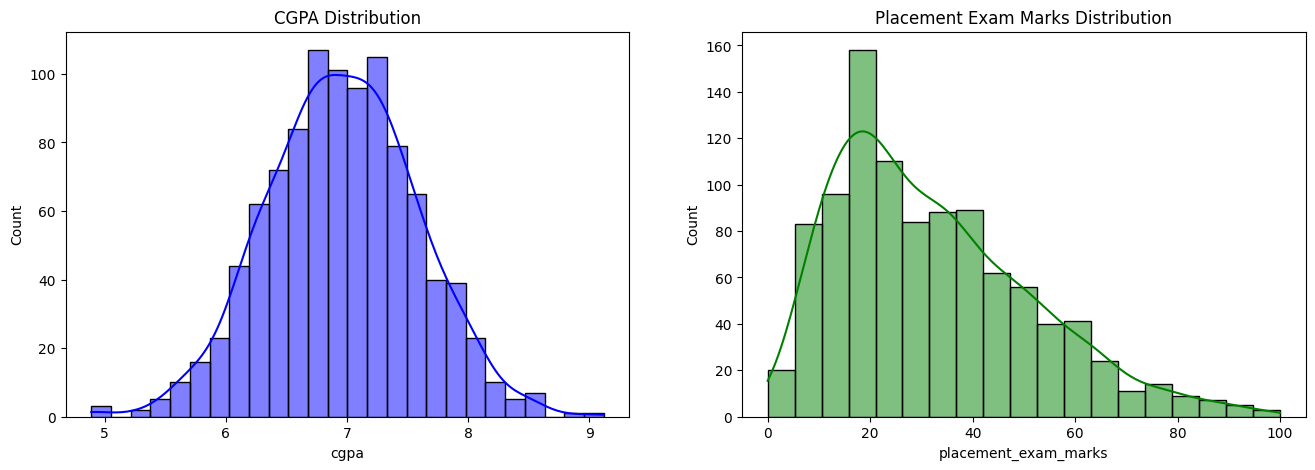

In [20]:
plt.figure(figsize=(16,5))

# CGPA distribution
plt.subplot(1,2,1)
sns.histplot(df['cgpa'], kde=True, color="blue")
plt.title("CGPA Distribution")

# Placement Exam Marks distribution
plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'], kde=True, color="green")
plt.title("Placement Exam Marks Distribution")

plt.show()

In [22]:
df["placement_exam_marks"].skew()

np.float64(0.8356419499466834)

In [23]:
df["cgpa"].skew()

np.float64(-0.014529938929314918)

In [25]:
print("Mean value of cgpa", df["cgpa"].mean())
print("Std value of cgpa", df["cgpa"].std())
print("Min value of cgpa", df["cgpa"].min())
print("Max value of cgpa", df["cgpa"].max())
print("Var value of cgpa", df["cgpa"].var())

Mean value of cgpa 6.96124
Std value of cgpa 0.6158978751323896
Min value of cgpa 4.89
Max value of cgpa 9.12
Var value of cgpa 0.37933019259259254


In [26]:
# Finding the Boundaries values

print("Highest allowed", df["cgpa"].mean() + 3*df["cgpa"].std())
print("Lowest allowed", df["cgpa"].mean() - 3*df["cgpa"].std())

Highest allowed 8.808933625397168
Lowest allowed 5.113546374602832


In [40]:
# Finding the Outliers
df[(df["cgpa"]>8.8) | (df["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [28]:
print("Mean value of placement_exam_marks", df["placement_exam_marks"].mean())
print("Std value of placement_exam_marks", df["placement_exam_marks"].std())
print("Min value of placement_exam_marks", df["placement_exam_marks"].min())
print("Max value of placement_exam_marks", df["placement_exam_marks"].max())
print("Var value of placement_exam_marks", df["placement_exam_marks"].var())

Mean value of placement_exam_marks 32.225
Std value of placement_exam_marks 19.13082233892112
Min value of placement_exam_marks 0.0
Max value of placement_exam_marks 100.0
Var value of placement_exam_marks 365.98836336336336


In [29]:

print("Highest allowed", df["placement_exam_marks"].mean() + 3*df["placement_exam_marks"].std())
print("Lowest allowed", df["placement_exam_marks"].mean() - 3*df["placement_exam_marks"].std())

Highest allowed 89.61746701676336
Lowest allowed -25.16746701676336


In [41]:
# Finding the Outliers
df[(df["placement_exam_marks"]> 89.61) | (df["placement_exam_marks"] < -25.16)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
134,6.33,93.0,0
162,7.80,90.0,0
324,6.64,90.0,0
630,6.56,96.0,1
730,6.14,90.0,1
846,6.99,97.0,0
917,5.95,100.0,0


<Axes: xlabel='placement_exam_marks'>

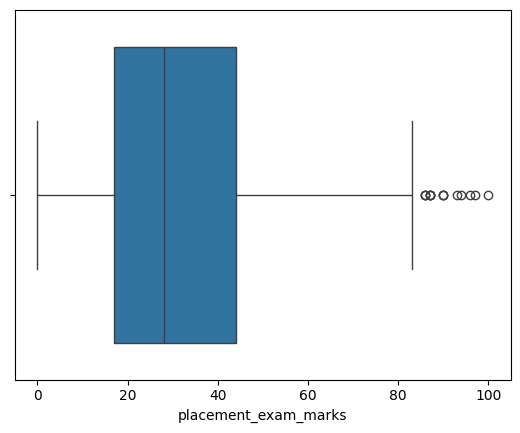

In [58]:
sns.boxplot(x = df["placement_exam_marks"], )

<Axes: ylabel='cgpa'>

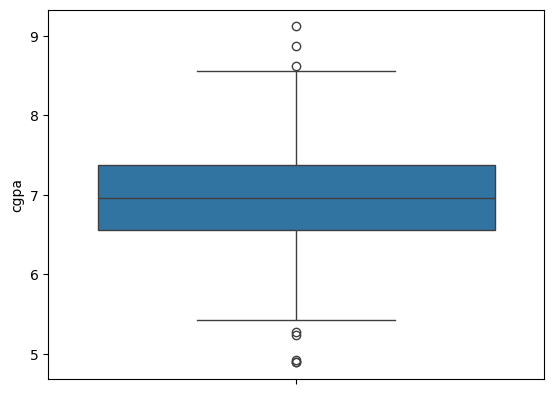

In [32]:
sns.boxplot(df["cgpa"])

### Trimming

In [43]:
new_df = df[(df["cgpa"] < 8.80) & (df["cgpa"]>5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


## Approch 2

### Calculating the Zscore

In [44]:
df["cgpa_Zscore"] = (df["cgpa"] - df["cgpa"].mean())/df["cgpa"].std()

In [45]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [46]:
df[df["cgpa_Zscore"] > 3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [47]:
df[df["cgpa_Zscore"] < -3]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [48]:
df[(df["cgpa_Zscore"] > 3) | (df["cgpa_Zscore"] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_Zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [50]:
# trimming
new_df = df[(df["cgpa_Zscore"] < 3) & (df["cgpa_Zscore"] > -3)]

In [51]:
new_df

,cgpa,placement_exam_marks,placed,cgpa_Zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


## Capping

In [52]:
upper_limit = df["cgpa"].mean() + 3*df["cgpa"].std()
lower_limit = df["cgpa"].mean() - 3*df["cgpa"].std()

In [53]:
df["cgpa"] = np.where(
    df["cgpa"]>upper_limit,
    upper_limit,
    np.where(
        df["cgpa"]<lower_limit,
        lower_limit,
        df["cgpa"]
    )
)

In [54]:
df.shape

(1000, 4)

In [55]:
df["cgpa"].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64